In [1]:
import trig_poly
import dual_certificates
import test_data
import numpy as np
import plt_util
import phase_transition
from matplotlib import pyplot as plt

%matplotlib inline

In [258]:
reload(test_data)
reload(dual_certificates)
reload(trig_poly)

m = 10
fc = 50
min_separation = 0.6 / fc
N = 20

kernel = trig_poly.TrigPoly.dirichlet(fc)

support = test_data.jittered_supports(N, min_separation=min_separation)
sign_pattern = test_data.uniform_sign_pattern_multidim(N, m)

In [259]:
zeros = np.zeros((N, N))
multiplier = (
    kernel.derivative().squared_norm() / kernel.squared_norm() * 1e8) * 10
G = np.kron(
    np.identity(m),
    dual_certificates._interpolator_norm_quadratic_form(kernel, support)) * multiplier
A, y = dual_certificates._interpolator_linear_constraints(kernel, support, sign_pattern)

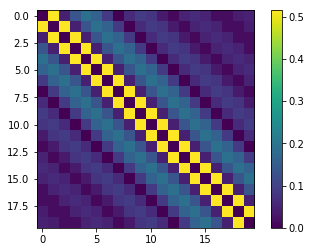

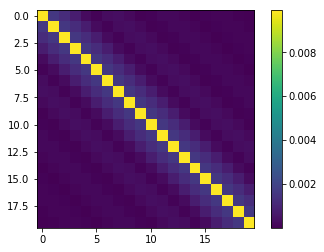

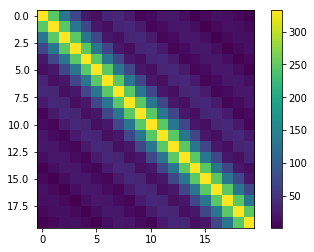

In [260]:
plt.figure(0)
plt.imshow(np.absolute(kernel.inners_of_shifts_and_derivative_shifts(support)))
plt.colorbar()

plt.figure(1)
plt.imshow(np.absolute(kernel.inners_of_shifts(support)))
plt.colorbar()

plt.figure(2)
plt.imshow(np.absolute(kernel.derivative().inners_of_shifts(support)))
plt.colorbar()

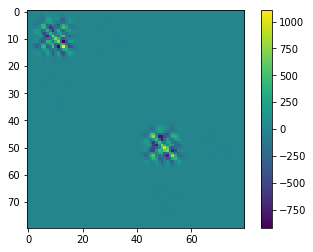

In [238]:
plt.imshow(np.linalg.inv(dual_certificates._interpolator_norm_quadratic_form(kernel, support) * multiplier))
plt.colorbar()

In [215]:
solution_mx = np.linalg.multi_dot([
        np.linalg.inv(G),
        A.T,
        np.linalg.inv(
            np.linalg.multi_dot([
                    A,
                    np.linalg.inv(G),
                    A.T
                ])
        )
    ])

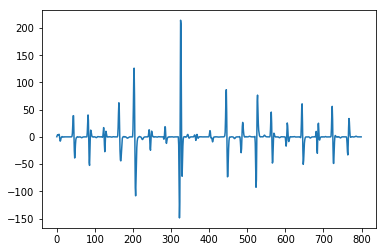

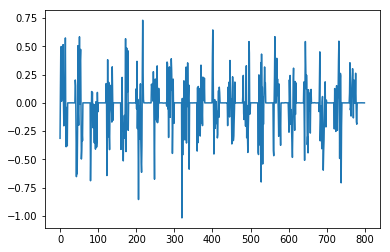

In [216]:
plt.figure(0)
plt.plot(np.dot(solution_mx, y).T.real.flat)

plt.figure(1)
intermediate = np.linalg.solve(
    np.linalg.multi_dot([
                    A,
                    np.linalg.inv(G),
                    A.T
                ]), y)
coeffs = np.linalg.solve(G, np.dot(A.T, intermediate).T)
plt.plot(coeffs.T.real.flat)

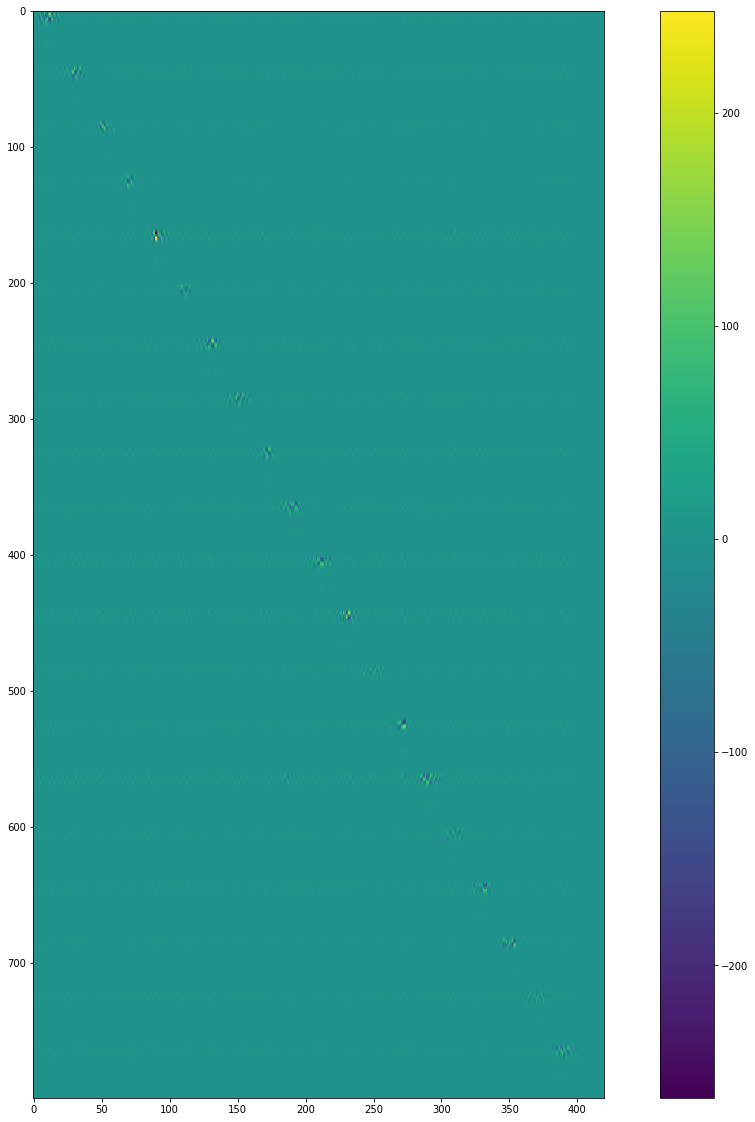

In [195]:
plt.subplots(figsize=(20, 20))
plt.imshow(solution_mx.real)
plt.colorbar()

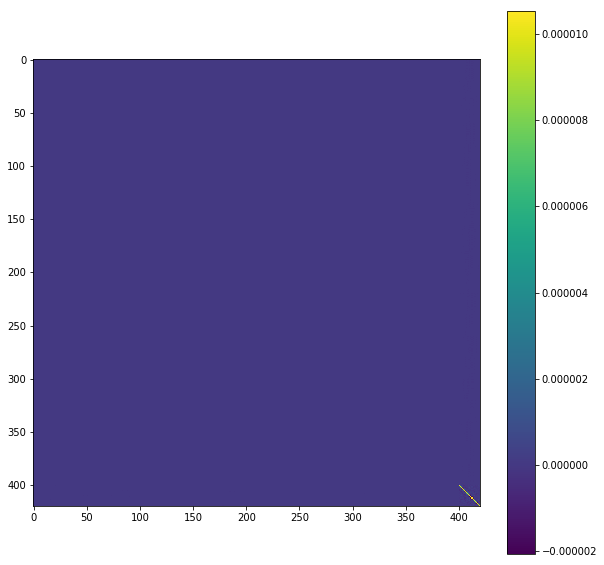

In [196]:
plt.subplots(figsize=(10, 10))
plt.imshow(np.linalg.multi_dot([
                    A,
                    np.linalg.inv(G),
                    A.T
                ]).real)
plt.colorbar()

In [197]:
interpolator = dual_certificates.interpolate_multidim_with_derivative(support, sign_pattern, kernel)

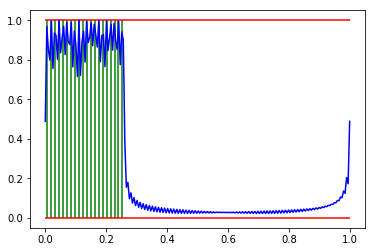

In [198]:
plt_util.plot_trig_poly_magnitude(interpolator)
plt_util.plot_support_magnitude_lines(support)
plt_util.plot_magnitude_bounds()

In [45]:
print dual_certificates.validate(support, sign_pattern, interpolator)

{'status': True, 'max_deviation': 1.6691363252574856e-14, 'values_achieved': True, 'bound_achieved': True}
